# Logistic Regression - Churn Prediction Project

### Problem Statement:

We want to predict whether a customer will churn (Churn column) based on various features like demographics (gender, SeniorCitizen, etc.), service details (tenure, InternetService, etc.), and financial data (MonthlyCharges, TotalCharges)

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
tc = pd.to_numeric(df.TotalCharges, errors='coerce')

In [10]:
df[tc.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [11]:
tc.isnull().sum()

11

In [12]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce').fillna(0)

In [13]:
df.TotalCharges.dtypes

dtype('float64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


<Axes: xlabel='Churn'>

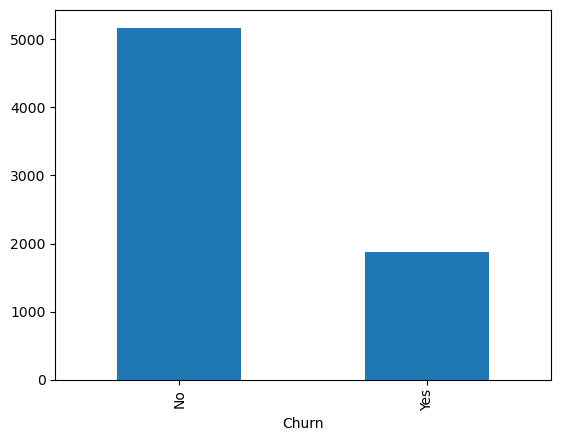

In [16]:
df.Churn.value_counts().plot(kind='bar')

In [17]:
df.Churn = (df.Churn == 'Yes').astype('int')

In [18]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Data Preparation

In [38]:
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
train_inputs, test_inputs, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
cat_cols = X.select_dtypes('object').columns
num_cols = X.select_dtypes(include=np.number).columns

#### Encoding

In [47]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [49]:
encoder = OneHotEncoder(drop='first')

In [51]:
train_cat = encoder.fit_transform(train_inputs[cat_cols])
test_cat = encoder.transform(test_inputs[cat_cols])

#### Scaling

In [54]:
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [56]:
scaler = StandardScaler()

In [58]:
train_num = scaler.fit_transform(train_inputs[num_cols])
test_num = scaler.transform(test_inputs[num_cols])

#### combine

In [61]:
train_processed = np.hstack((train_num, train_cat.toarray()))
test_processed = np.hstack((test_num, test_cat.toarray()))

### Model Selection

In [64]:
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression()

In [68]:
model.fit(train_processed, train_target)

LogisticRegression()

In [70]:
train_pred = model.predict(train_processed)

In [72]:
test_pred = model.predict(test_processed)

In [76]:
data = pd.DataFrame()
data['Actual'] = train_target
data['Predicted'] = train_pred

In [78]:
data['Evaluate'] = data.Actual == data.Predicted

In [80]:
data.head(10)

,Actual,Predicted,Evaluate
2142,0,0,True
1623,0,0,True
6074,1,1,True
1362,1,1,True
6754,0,0,True
1212,0,1,False
2722,0,0,True
4006,0,0,True
6791,1,1,True
5466,0,0,True


### Classification Metrics

In [83]:
from sklearn.metrics import accuracy_score

In [85]:
train_acc = accuracy_score(train_pred, train_target)
train_acc

0.80386936457224

In [87]:
test_acc = accuracy_score(test_pred, test_target)
test_acc

0.8211497515968772

#### Confusion Matrix

In [90]:
from sklearn.metrics import confusion_matrix

In [92]:
cm = confusion_matrix(test_pred, test_target)

In [94]:
cm

array([[934, 150],
       [102, 223]], dtype=int64)

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

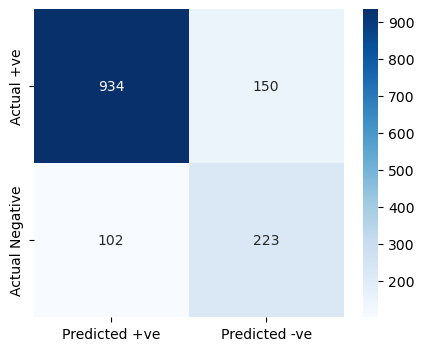

In [102]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, fmt='d', annot=True, cmap='Blues', 
           xticklabels=['Predicted +ve', 'Predicted -ve'],
           yticklabels=['Actual +ve', 'Actual Negative'])